In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# LOADING LABELS

In [ ]:
base_path = "/content/drive/MyDrive/UCI HAR Dataset/"

# Recommended updated syntax using sep='\s+'
X_train = pd.read_csv(base_path + "train/X_train.txt", sep='\s+', header=None)
y_train = pd.read_csv(base_path + "train/y_train.txt", sep='\s+', header=None)

X_test = pd.read_csv(base_path + "test/X_test.txt", sep='\s+', header=None)
y_test = pd.read_csv(base_path + "test/y_test.txt", sep='\s+', header=None)

print(X_train.shape, y_train.shape)

(7352, 561) (7352, 1)


In [ ]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


# VISULIZATION OF RAW DATA [ACCELERATION]

In [ ]:
#load y_train data

y_train = pd.read_csv(base_path + 'train/y_train.txt' , sep = "\s+" , header = None)

# load raw signals (acceleration x,y,z)
acc_x = pd.read_csv(base_path + 'train/Inertial Signals/body_acc_x_train.txt' , sep = "\s+" , header = None)
acc_y = pd.read_csv(base_path + 'train/Inertial Signals/body_acc_y_train.txt' , sep = "\s+" , header = None)
acc_z = pd.read_csv(base_path + 'train/Inertial Signals/body_acc_z_train.txt' , sep = "\s+" , header = None)

activity_labels = {
    1: 'WALKING',
    2: 'WALKING_UPSTAIRS',
    3: 'WALKING_DOWNSTAIRS',
    4: 'SITTING',
    5: 'STANDING',
    6: 'LAYING'
}

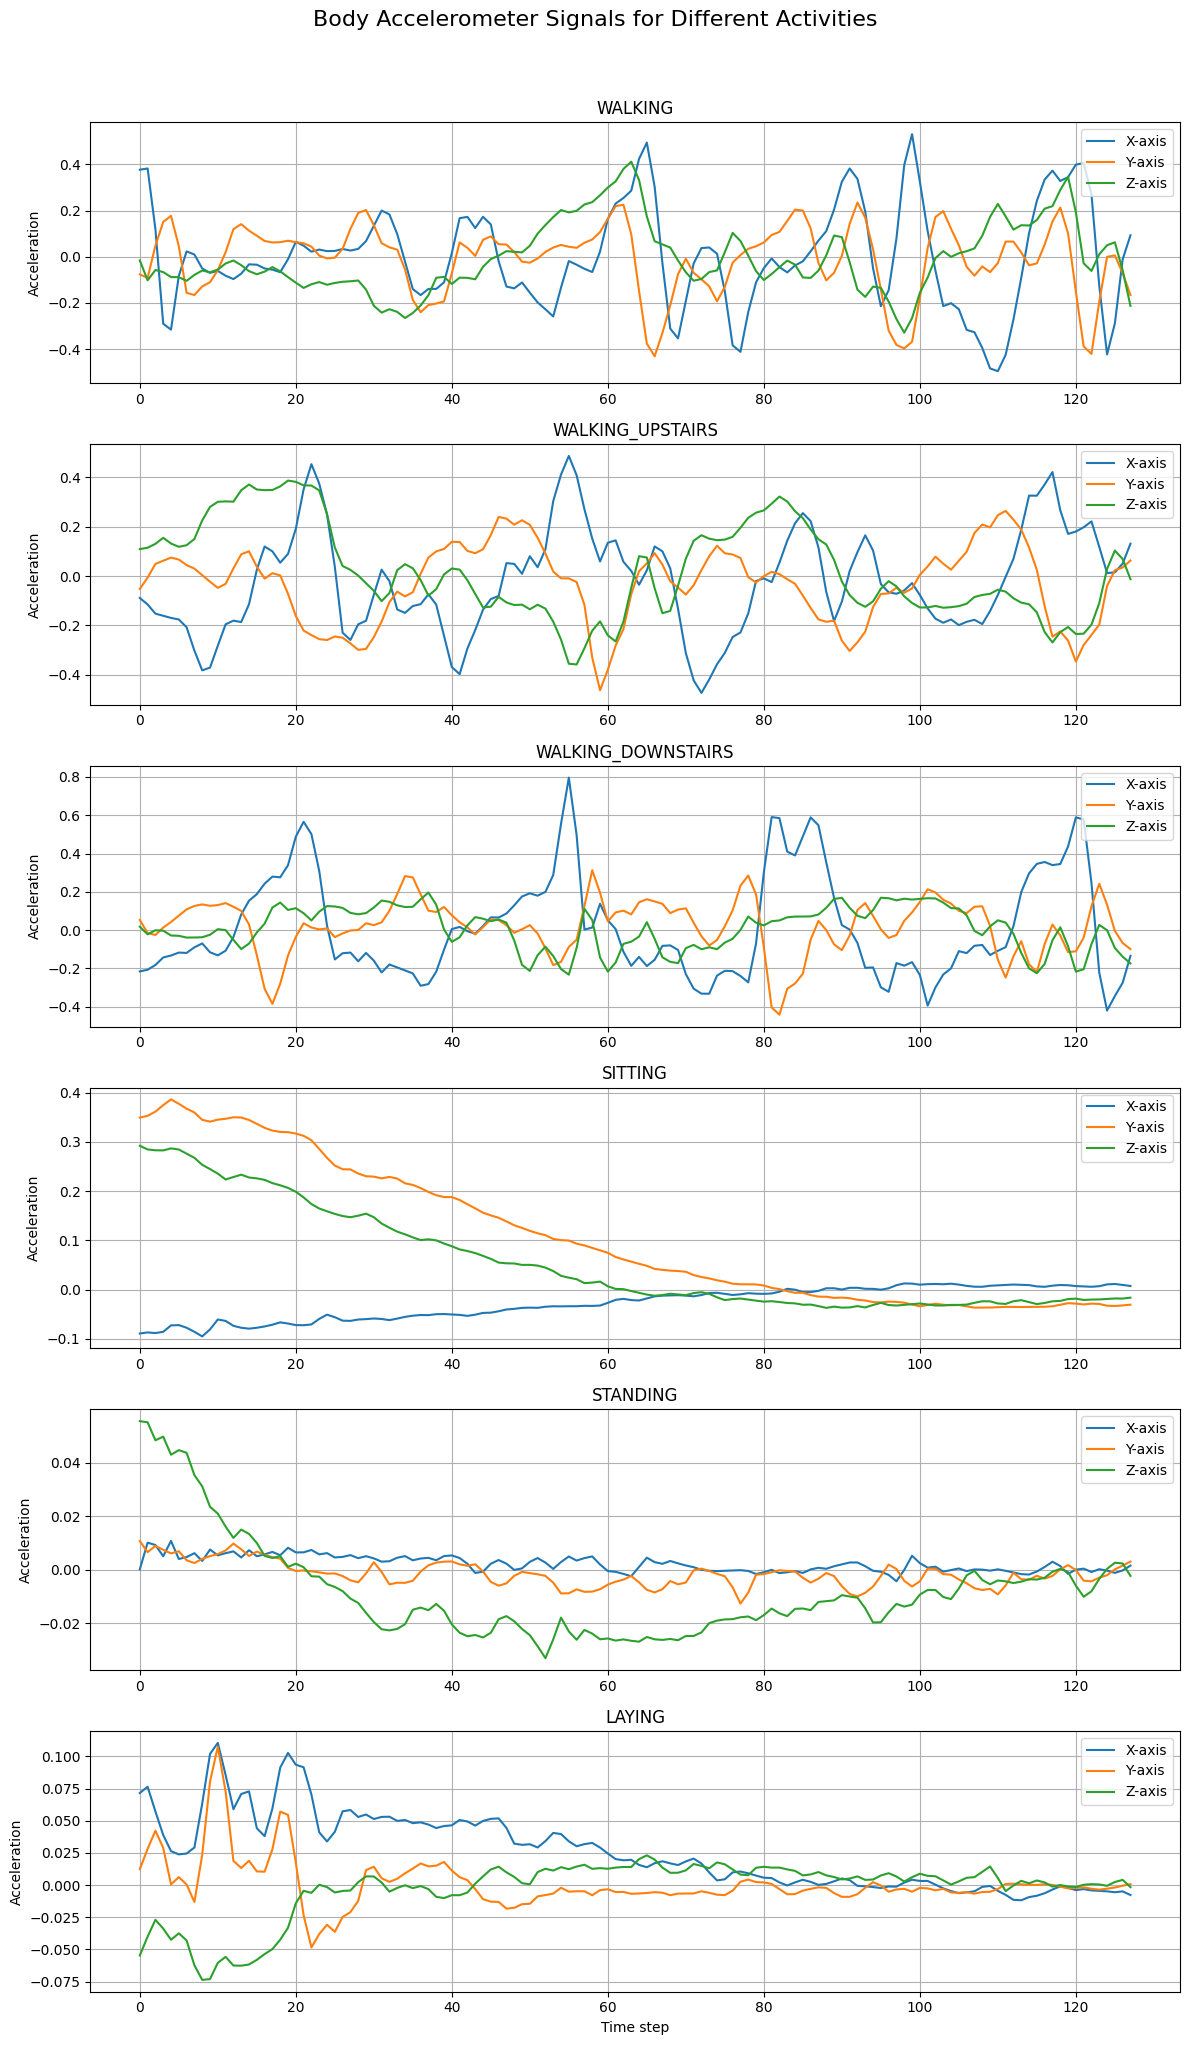

In [ ]:
# Plot signals for one sample of each activity
fig , ax = plt.subplots(nrows = 6 , ncols = 1, figsize = (12,20))

for i, activity_id in enumerate(range(1,7)):
  # Find index of first occurrence of each activity
  sample_index = y_train[y_train[0] == activity_id].index[0]

  x = acc_x.iloc[sample_index].values
  y = acc_y.iloc[sample_index].values
  z = acc_z.iloc[sample_index].values

  # Plot
  ax[i].plot(x , label='X-axis')
  ax[i].plot(y , label='Y-axis')
  ax[i].plot(z , label='Z-axis')
  ax[i].set_title(f'{activity_labels[activity_id]}')
  ax[i].set_ylabel('Acceleration')
  ax[i].legend(loc = 'upper right')
  ax[i].grid()

  ax[-1].set_xlabel('Time step')
  plt.tight_layout()
  plt.suptitle('Body Accelerometer Signals for Different Activities', y=1.02, fontsize=16)

plt.show()

# VISULIZATION OF RAW DATA [GYROSCOPE]

In [ ]:
# load y_train
y_train = pd.read_csv(base_path + 'train/y_train.txt' , sep = "\s+" , header = None)

# load raw signals (gyro)
gyro_x = pd.read_csv(base_path + 'train/Inertial Signals/body_gyro_x_train.txt' , sep = '\s+' , header = None)
gyro_y = pd.read_csv(base_path + 'train/Inertial Signals/body_gyro_y_train.txt' , sep = '\s+' , header = None)
gyro_z = pd.read_csv(base_path + 'train/Inertial Signals/body_gyro_z_train.txt' , sep = '\s+' , header = None)

activity_labels = {
    1 : 'WALKING',
    2 : 'WALKING_UPSTAIRS',
    3 : 'WALKING_DOWNSTAIRS',
    4 : 'SITTING',
    5 : 'STANDING',
    6 : 'LAYING'
}

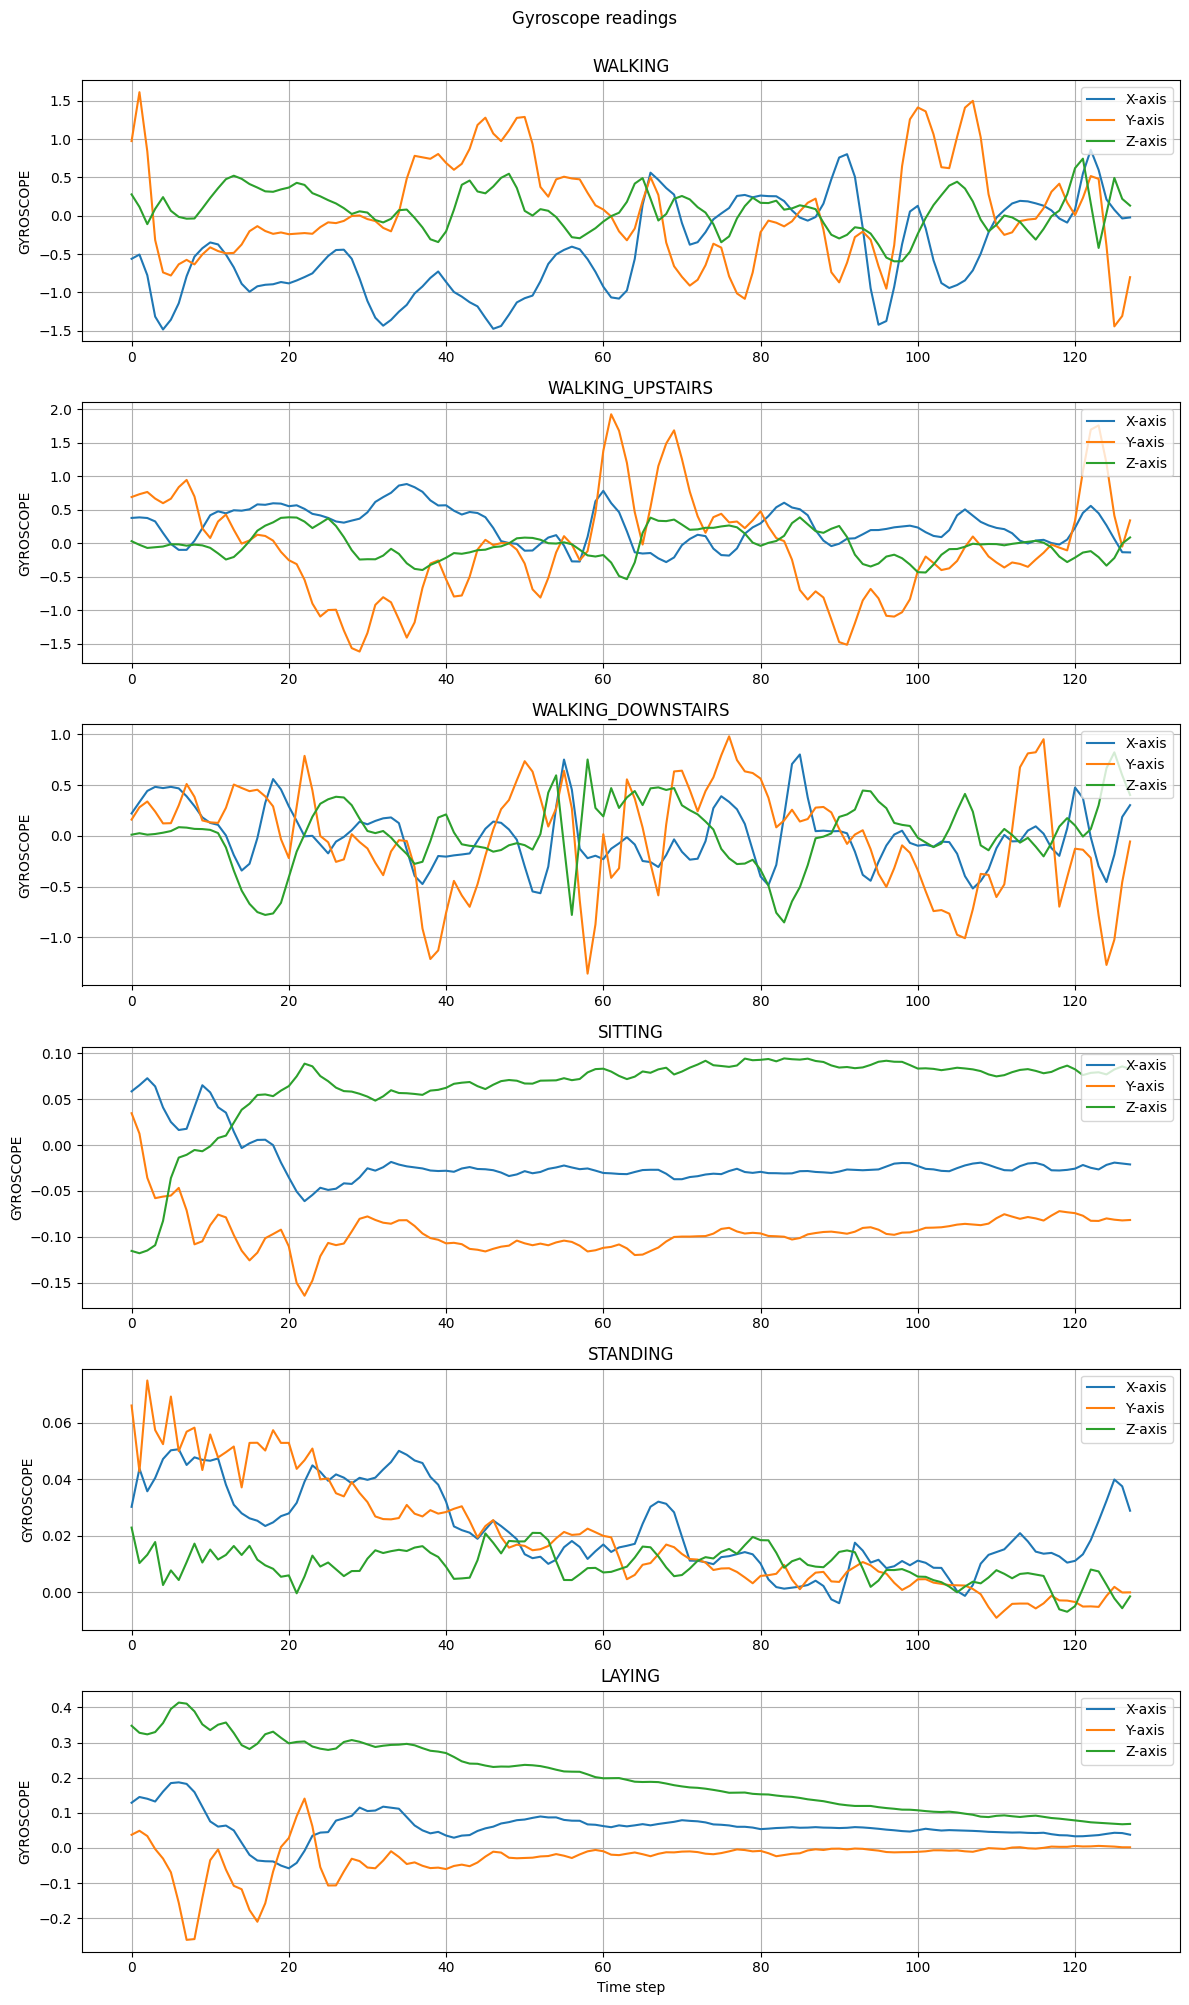

In [ ]:
# Ploting gyro signals
fig , ax = plt.subplots(nrows = 6 , ncols = 1 , figsize = (12,20))

for i , activity_id in enumerate(range(1,7)):
  sample_index = y_train[y_train[0] == activity_id].index[0]

  x = gyro_x.iloc[sample_index].values
  y = gyro_y.iloc[sample_index].values
  z = gyro_z.iloc[sample_index].values

  # Ploting
  ax[i].plot(x , label = 'X-axis')
  ax[i].plot(y , label = 'Y-axis')
  ax[i].plot(z , label = 'Z-axis')

  ax[i].set_title(f'{activity_labels[activity_id]}')
  ax[i].set_ylabel('GYROSCOPE')
  ax[i].legend(loc = 'upper right')
  ax[i].grid()
  ax[-1].set_xlabel('Time step')
  plt.tight_layout()
  plt.suptitle('Gyroscope readings' , y = 1)

plt.show()

# VISULIZATION OF RAW DATA [Total Acc]

In [ ]:
# load y_train
y_train = pd.read_csv(base_path + 'train/y_train.txt' , sep = "\s+" , header = None)

# load raw signals (gyro)
total_x = pd.read_csv(base_path + 'train/Inertial Signals/total_acc_x_train.txt' , sep = '\s+' , header = None)
total_y = pd.read_csv(base_path + 'train/Inertial Signals/total_acc_y_train.txt' , sep = '\s+' , header = None)
total_z = pd.read_csv(base_path + 'train/Inertial Signals/total_acc_z_train.txt' , sep = '\s+' , header = None)

activity_labels = {
    1 : 'WALKING',
    2 : 'WALKING_UPSTAIRS',
    3 : 'WALKING_DOWNSTAIRS',
    4 : 'SITTING',
    5 : 'STANDING',
    6 : 'LAYING'
}

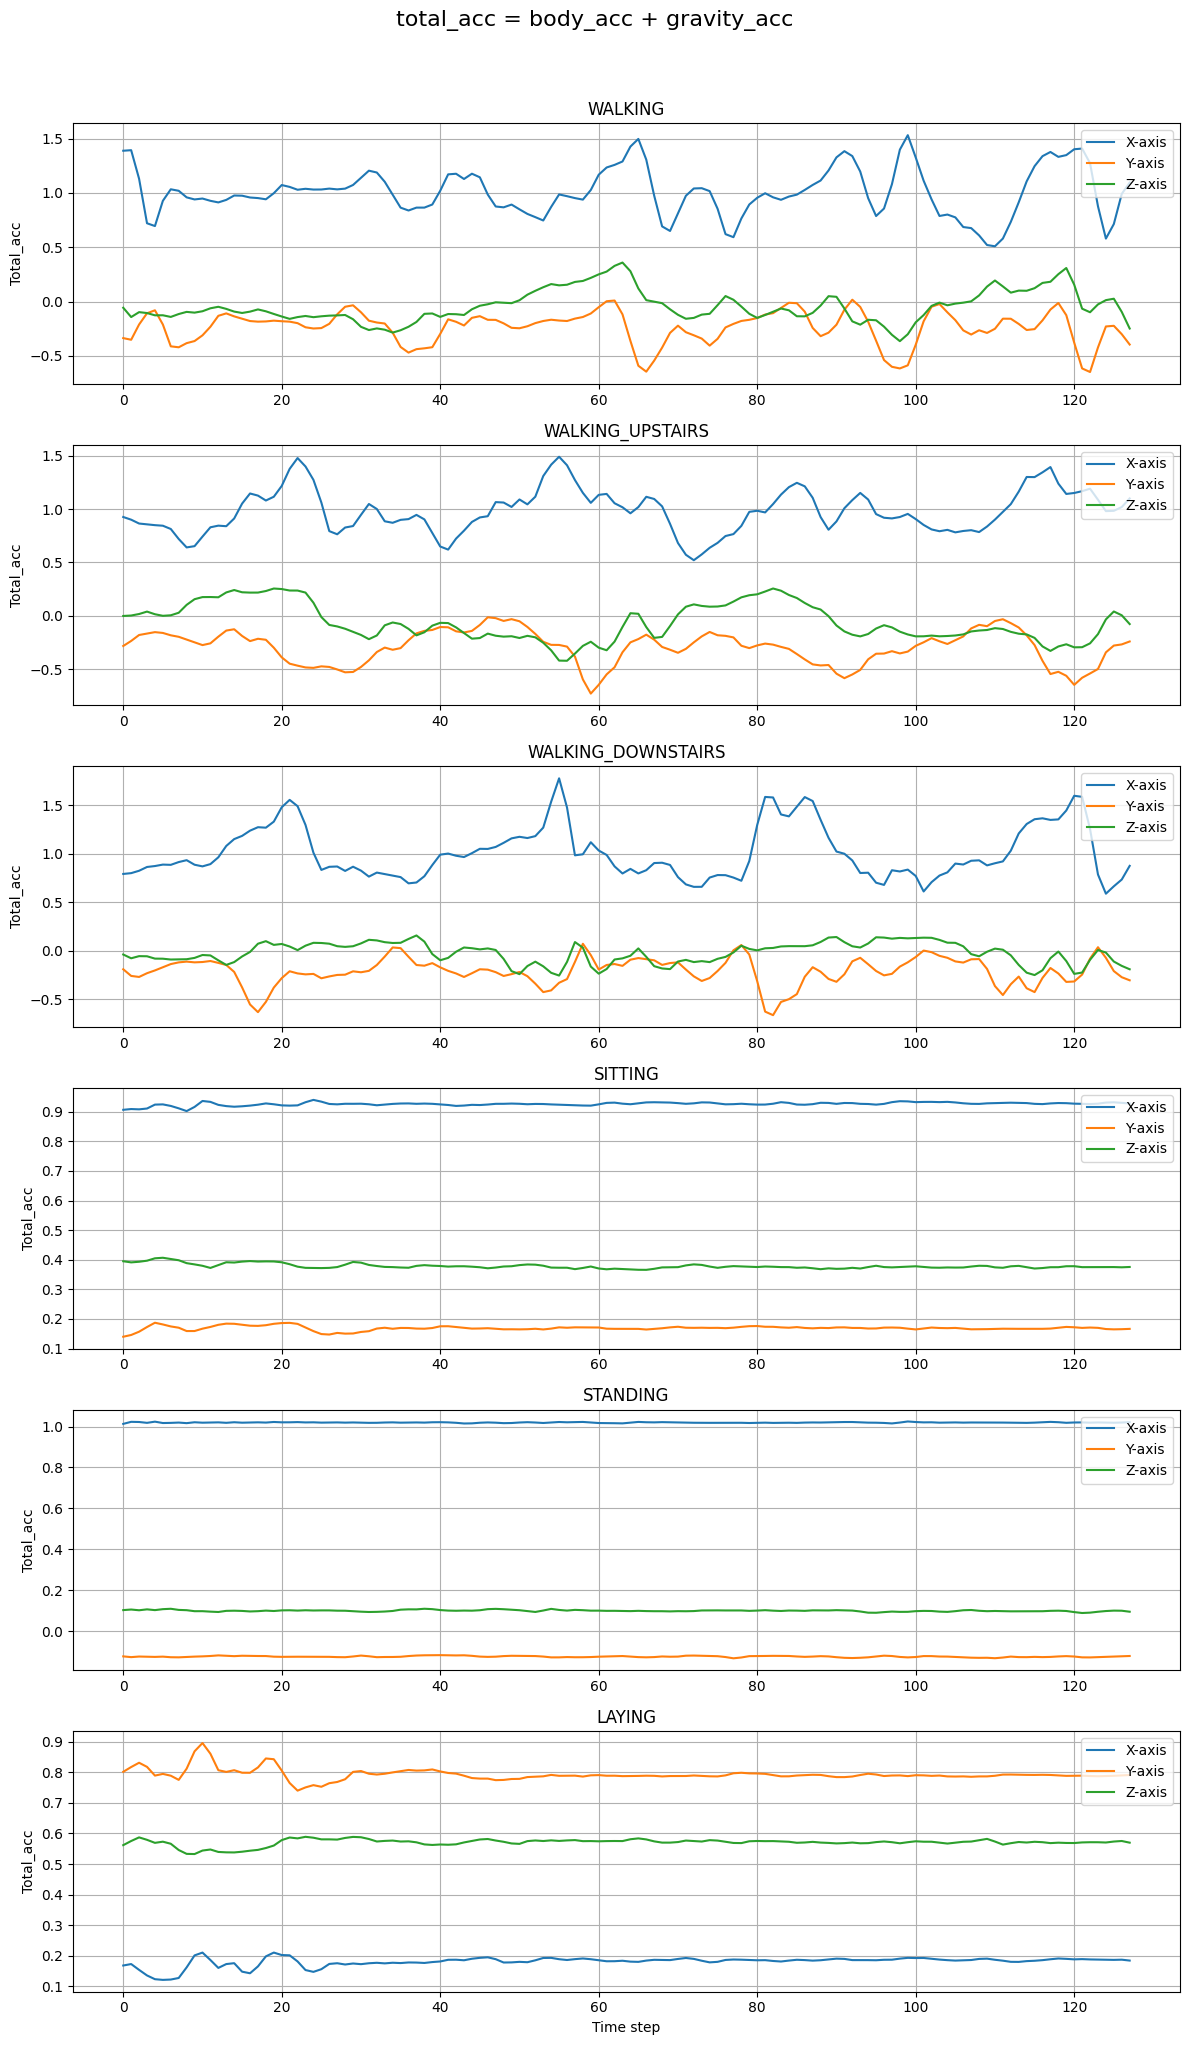

In [ ]:
# Ploting gyro signals
fig , ax = plt.subplots(nrows = 6 , ncols = 1 , figsize = (12,20))

for i , activity_id in enumerate(range(1,7)):
  sample_index = y_train[y_train[0] == activity_id].index[0]

  x = total_x.iloc[sample_index].values
  y = total_y.iloc[sample_index].values
  z = total_z.iloc[sample_index].values

  # Ploting
  ax[i].plot(x , label = 'X-axis')
  ax[i].plot(y , label = 'Y-axis')
  ax[i].plot(z , label = 'Z-axis')

  ax[i].set_title(f'{activity_labels[activity_id]}')
  ax[i].set_ylabel('Total_acc')
  ax[i].legend(loc = 'upper right')
  ax[i].grid()
  plt.tight_layout()
  plt.suptitle('total_acc = body_acc + gravity_acc', y=1.02, fontsize=16)
  ax[-1].set_xlabel('Time step')

plt.show()

# PREPROCESSING(NOT RAW DATA)

In [ ]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.fit_transform(X_test)


# TRAINING AN BASELINE MODEL
- using RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix , accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

np.random.seed(42)

model = RandomForestClassifier()

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

print(f'Accuracy : ' , accuracy_score(y_test , y_pred));
print(f'Classification report : ' , classification_report(y_test , y_pred));
print(f'Confusion Matrix : ' , confusion_matrix(y_test , y_pred));

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy :  0.9260264675941635
Classification report :                precision    recall  f1-score   support

           1       0.95      0.93      0.94       496
           2       0.90      0.95      0.92       471
           3       0.93      0.90      0.92       420
           4       0.85      0.92      0.88       491
           5       0.92      0.85      0.88       532
           6       1.00      1.00      1.00       537

    accuracy                           0.93      2947
   macro avg       0.93      0.93      0.93      2947
weighted avg       0.93      0.93      0.93      2947

Confusion Matrix :  [[462  15  19   0   0   0]
 [ 17 446   8   0   0   0]
 [  7  33 380   0   0   0]
 [  0   0   0 453  38   0]
 [  0   0   0  81 451   0]
 [  0   0   0   0   0 537]]


# **using Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

np.random.seed(42)

model = LogisticRegression()

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
print(f'Accuracy : ' , accuracy_score(y_test , y_pred));
print(f'Classification report : ' , classification_report(y_test , y_pred));
print(f'Confusion Matrix : ' , confusion_matrix(y_test , y_pred));

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy :  0.9613165931455717
Classification report :                precision    recall  f1-score   support

           1       0.98      0.97      0.97       496
           2       0.95      0.97      0.96       471
           3       0.97      0.96      0.97       420
           4       0.95      0.91      0.93       491
           5       0.92      0.95      0.94       532
           6       1.00      1.00      1.00       537

    accuracy                           0.96      2947
   macro avg       0.96      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947

Confusion Matrix :  [[482   5   9   0   0   0]
 [ 12 457   2   0   0   0]
 [  0  15 404   0   1   0]
 [  0   2   0 447  41   1]
 [  0   0   0  25 507   0]
 [  0   0   0   0   1 536]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Tuining Logisticc Regression

from scipy.stats import loguniform, randint
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'C': loguniform(1e-4, 1e4),
    'penalty': ['l1', 'l2', 'elasticnet'],
    'l1_ratio': [None, 0.1, 0.5, 0.7, 0.9],
    'max_iter': randint(100, 2000),
    'fit_intercept': [True, False],
    'class_weight': [None, 'balanced'],
    'solver': ['saga'],
}

np.random.seed(42)


random_search = RandomizedSearchCV(estimator = model,
                                   param_distributions = param_dist,
                                   n_iter = 5,
                                   n_jobs = -1,
                                   cv = 3,
                                   verbose = 2,
                                   scoring = 'accuracy')

random_search.fit(X_train_scaled , y_train)

print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validation Accuracy:", random_search.best_score_)

# Use best model
best_model = random_search.best_estimator_

# Evaluate on test set
y_pred = best_model.predict(X_test_scaled)
print("\nTest Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Fitting 3 folds for each of 5 candidates, totalling 15 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
3 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1203, in fit
    raise ValueError("l1_rat

Best Parameters: {'C': np.float64(5.953896264004558), 'class_weight': 'balanced', 'fit_intercept': True, 'l1_ratio': 0.5, 'max_iter': 1582, 'penalty': 'l1', 'solver': 'saga'}
Best Cross-Validation Accuracy: 0.9355292994390739

Test Accuracy: 0.9562266711910418

Classification Report:
               precision    recall  f1-score   support

           1       0.97      0.97      0.97       496
           2       0.96      0.96      0.96       471
           3       0.97      0.97      0.97       420
           4       0.95      0.90      0.92       491
           5       0.90      0.95      0.93       532
           6       1.00      0.98      0.99       537

    accuracy                           0.96      2947
   macro avg       0.96      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
from sklearn.linear_model import LogisticRegression

np.random.seed(42)

model = LogisticRegression(C = np.float64(5.953896264004558),
                           class_weight='balanced',
                           fit_intercept=True,
                           l1_ratio=0.5,
                           max_iter=1582,
                           penalty='l1',
                           solver='saga')


model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
print(f'Accuracy : ' , accuracy_score(y_test , y_pred));
print(f'Classification report : ' , classification_report(y_test , y_pred));
print(f'Confusion Matrix : ' , confusion_matrix(y_test , y_pred));

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy :  0.9569053274516457
Classification report :                precision    recall  f1-score   support

           1       0.97      0.97      0.97       496
           2       0.96      0.96      0.96       471
           3       0.97      0.97      0.97       420
           4       0.95      0.90      0.92       491
           5       0.90      0.95      0.93       532
           6       1.00      0.98      0.99       537

    accuracy                           0.96      2947
   macro avg       0.96      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947

Confusion Matrix :  [[483   4   9   0   0   0]
 [ 13 454   4   0   0   0]
 [  2  12 406   0   0   0]
 [  0   2   0 443  45   1]
 [  0   0   0  25 507   0]
 [  0   0   0   0  10 527]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
print(f'Accuracy : ' , accuracy_score(y_test , y_pred));
print(f'Classification report : ' , classification_report(y_test , y_pred));
print(f'Confusion Matrix : ' , confusion_matrix(y_test , y_pred));

Accuracy :  0.8038683406854428
Classification report :                precision    recall  f1-score   support

           1       0.88      0.88      0.88       496
           2       0.86      0.80      0.83       471
           3       0.81      0.88      0.84       420
           4       0.59      0.81      0.68       491
           5       0.73      0.48      0.58       532
           6       1.00      1.00      1.00       537

    accuracy                           0.80      2947
   macro avg       0.81      0.81      0.80      2947
weighted avg       0.81      0.80      0.80      2947

Confusion Matrix :  [[435  22  39   0   0   0]
 [ 45 378  48   0   0   0]
 [ 13  38 369   0   0   0]
 [  0   0   0 396  95   0]
 [  0   0   0 278 254   0]
 [  0   0   0   0   0 537]]


# TUNING RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score
from scipy.stats import randint

# Define the model
rf = RandomForestClassifier(random_state=42)

# Define the parameter distribution
param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['sqrt', 'log2', None]
}

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf,
                                   param_distributions=param_dist,
                                   n_iter=10,
                                   cv=2,
                                   scoring='accuracy',
                                   random_state=42,
                                   n_jobs=-1,
                                   verbose=2)

# Fit on training data
random_search.fit(X_train_scaled, y_train)

# Best estimator and score
print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validation Accuracy:", random_search.best_score_)

# Use best model
best_model = random_search.best_estimator_

# Evaluate on test set
y_pred = best_model.predict(X_test_scaled)
print("\nTest Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Fitting 2 folds for each of 10 candidates, totalling 20 fits


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Best Parameters: {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 187}
Best Cross-Validation Accuracy: 0.9241022850924918

Test Accuracy: 0.9205972175093315

Classification Report:
               precision    recall  f1-score   support

           1       0.96      0.94      0.95       496
           2       0.91      0.96      0.94       471
           3       0.92      0.88      0.90       420
           4       0.79      0.97      0.87       491
           5       0.97      0.77      0.86       532
           6       1.00      1.00      1.00       537

    accuracy                           0.92      2947
   macro avg       0.93      0.92      0.92      2947
weighted avg       0.93      0.92      0.92      2947



In [ ]:
from sklearn.model_selection import cross_val_score

model = RandomForestClassifier(n_estimators=187 ,
                               max_depth = 20,
                               max_features = 'log2',
                               min_samples_leaf = 1,
                               min_samples_split = 3,
                               random_state = 42)

scores = cross_val_score(model, X_train_scaled, y_train.values.ravel(), cv=5)
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())


Cross-validation scores: [0.90618627 0.91366417 0.94081633 0.93061224 0.96326531]
Mean accuracy: 0.930908863885459


# SVM

In [ ]:
from sklearn.svm import SVC
np.random.seed(42)
model = SVC()

model.fit(X_train_scaled , y_train)
y_pred = model.predict(X_test_scaled)

print(f'Accuracy : ' , accuracy_score(y_test , y_pred));
print(f'Classification Report : ' , classification_report(y_test , y_pred));
print(f'Confusion Matrix : ' , confusion_matrix(y_test , y_pred));

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy :  0.9565659993213438
Classification Report :                precision    recall  f1-score   support

           1       0.98      0.95      0.97       496
           2       0.94      0.99      0.96       471
           3       0.95      0.93      0.94       420
           4       0.93      0.92      0.93       491
           5       0.94      0.94      0.94       532
           6       1.00      1.00      1.00       537

    accuracy                           0.96      2947
   macro avg       0.96      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947

Confusion Matrix :  [[473   6  17   0   0   0]
 [  4 466   1   0   0   0]
 [  5  23 392   0   0   0]
 [  0   1   1 453  34   2]
 [  0   0   0  34 498   0]
 [  0   0   0   0   0 537]]


In [ ]:
# Tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC

svm = SVC()
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']  # Only applies to rbf kernel
}

random_search = RandomizedSearchCV(estimator = svm,
                                   param_distributions = param_grid,
                                   cv = 5,
                                   n_iter = 10,
                                   n_jobs = -1,
                                   verbose = 2,
                                   scoring = 'accuracy',
                                   random_state = 42)

random_search.fit(X_train_scaled, y_train)

print(f'Best Parameters : ' , random_search.best_params_)
print(f'Best Cross-Validation Accuracy : ' , random_search.best_score_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best Parameters :  {'kernel': 'linear', 'gamma': 'scale', 'C': 0.1}
Best Cross-Validation Accuracy :  0.9368956284077192


In [ ]:
svm = SVC(C=0.1, gamma='scale', kernel='linear')

svm.fit(X_train_scaled, y_train)
y_pred = svm.predict(X_test_scaled)

print(f'Accuracy : ' , accuracy_score(y_test , y_pred));
print(f'Classification Report : ' , classification_report(y_test , y_pred));

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy :  0.9619952494061758
Classification Report :                precision    recall  f1-score   support

           1       0.98      0.98      0.98       496
           2       0.96      0.98      0.97       471
           3       0.98      0.97      0.97       420
           4       0.94      0.91      0.92       491
           5       0.92      0.94      0.93       532
           6       1.00      1.00      1.00       537

    accuracy                           0.96      2947
   macro avg       0.96      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947



In [ ]:
print('Confusion Matrix : ' , confusion_matrix(y_test , y_pred))

Confusion Matrix :  [[484   7   5   0   0   0]
 [  8 460   3   0   0   0]
 [  3  11 406   0   0   0]
 [  0   2   0 446  43   0]
 [  0   0   0  30 502   0]
 [  0   0   0   0   0 537]]


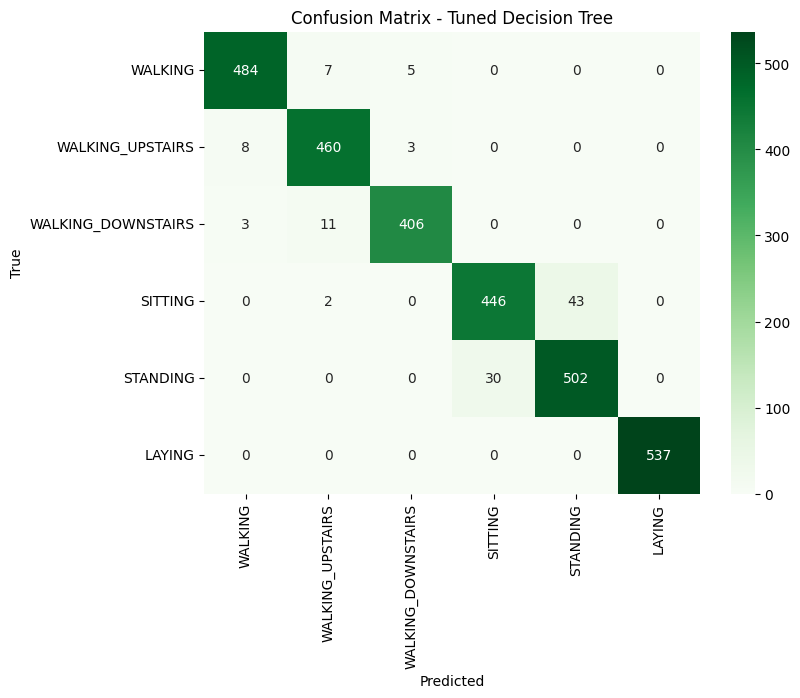

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=activity_labels.values(),
            yticklabels=activity_labels.values())
plt.title("Confusion Matrix - Tuned Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


So far SVM have the highest accuracy yet!!!

In [ ]:
# DATA TOO LARGE TO TUNE TAKING TOO MUCH TIME!
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

rf = RandomForestClassifier()

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(estimator = rf,
                           param_grid = param_grid,
                           cv = 5,
                           verbose = 2,
                           n_jobs = -1,
                           scoring = 'accuracy')

grid_search.fit(X_train_scaled, y_train)

print(f'Best Parameters : ' , grid_search.best_params_)
print(f'Best Cross-Validation Accuracy : ' , grid_search.best_score_)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test_scaled)

print(f'Accuracy : ' , accuracy_score(y_test , y_pred));

Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Best Parameters :  {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validation Accuracy :  0.9318606898911842
Accuracy :  0.9097387173396675
